## **Implemention of The Single Neuron Logistic Regression Model**

---

### **Candidates_data Dataset**
#### **Part 1. Simple Input**

Using candidates' gmat score to predict class of admit and not admit.

In [365]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [366]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [367]:
df = pd.read_csv("Datasets/candidates_data.csv")

Admit = df[df.admitted == 1]
Notadmit = df[df.admitted == 0]

df.head(5)

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


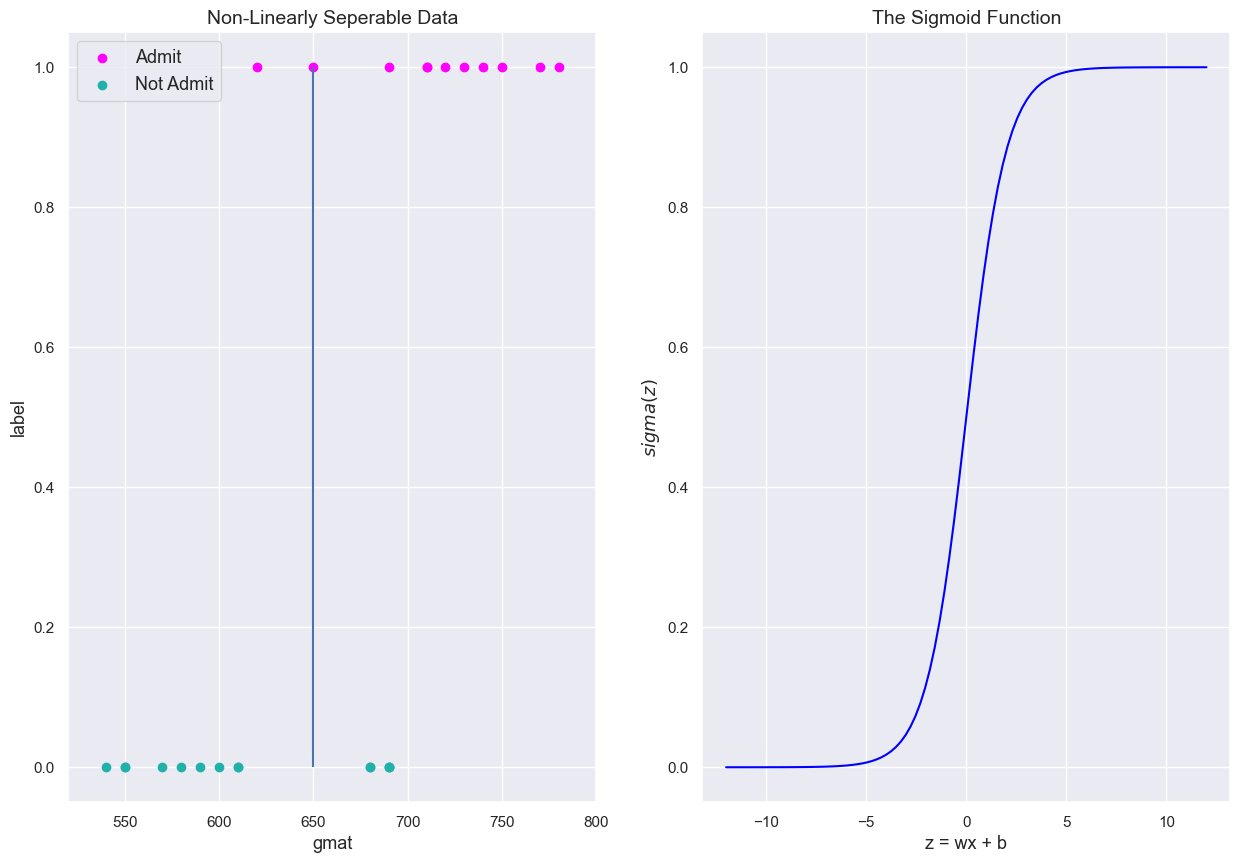

In [368]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((520, 800))
ax1.scatter(Admit.gmat, 
            Admit.admitted, 
            color = "magenta", 
            label = "Admit")
ax1.scatter(Notadmit.gmat, 
            Notadmit.admitted, 
            color = "lightseagreen", 
            label = "Not Admit")
ax1.vlines(650, 0.0, 1.0)
ax1.set_xlabel("gmat", fontsize = 13)
ax1.set_ylabel("label", fontsize = 13)
ax1.legend(fontsize = 13, loc = "upper left")
ax1.set_title("Non-Linearly Seperable Data", fontsize = 14)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 13)
ax2.set_ylabel("$sigma(z)$", fontsize = 13)
ax2.set_title("The Sigmoid Function", fontsize = 14)
plt.show()

In [369]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.gmat.values/100
X = X.reshape(-1, 1)
y = df.admitted.values

node.train(X, y, alpha = 0.03, epochs = 5_000)

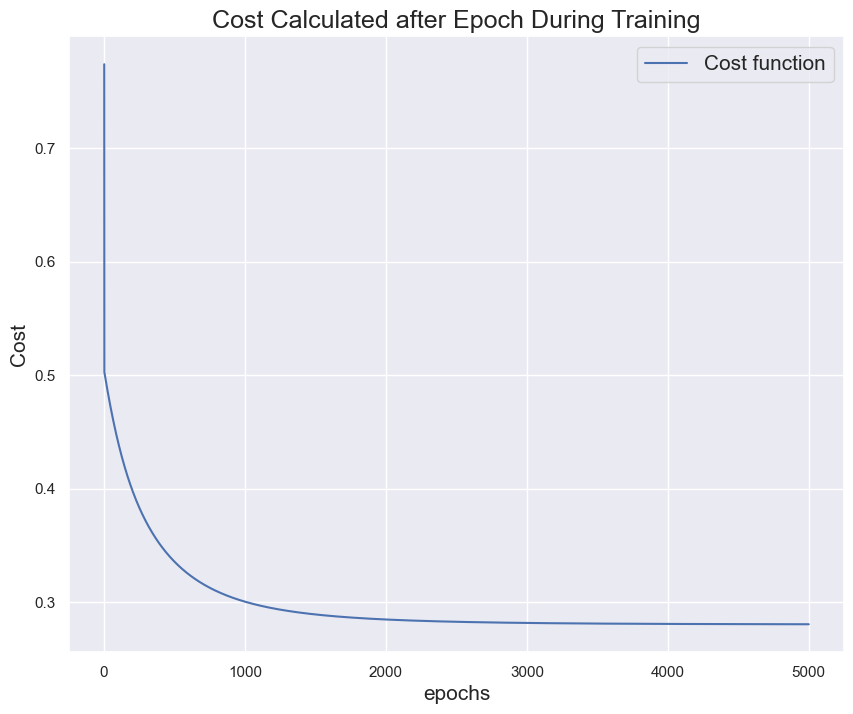

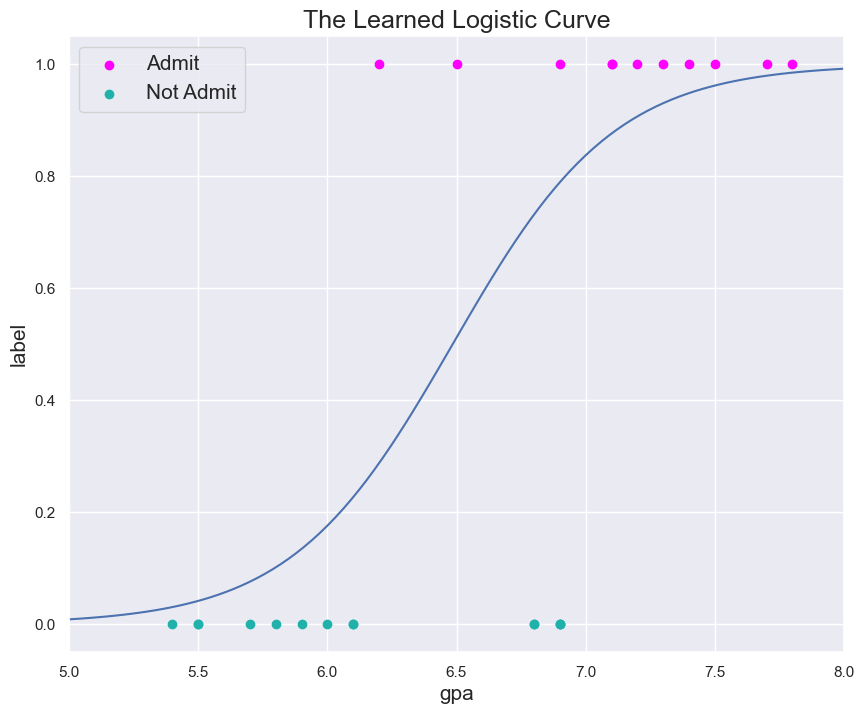

In [370]:
node.plot_cost_function()
plt.show()

plt.figure(figsize = (10, 8))
plt.xlim((5, 8))
plt.scatter(Admit.gmat/100, 
            Admit.admitted, 
            color = "magenta", 
            label = "Admit")
plt.scatter(Notadmit.gmat/100, 
            Notadmit.admitted, 
            color = "lightseagreen", 
            label = "Not Admit")

domain = np.linspace(5, 8, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("gpa", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [371]:
node.predict(X)
np.rint(node.predict(X)) != y
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.24


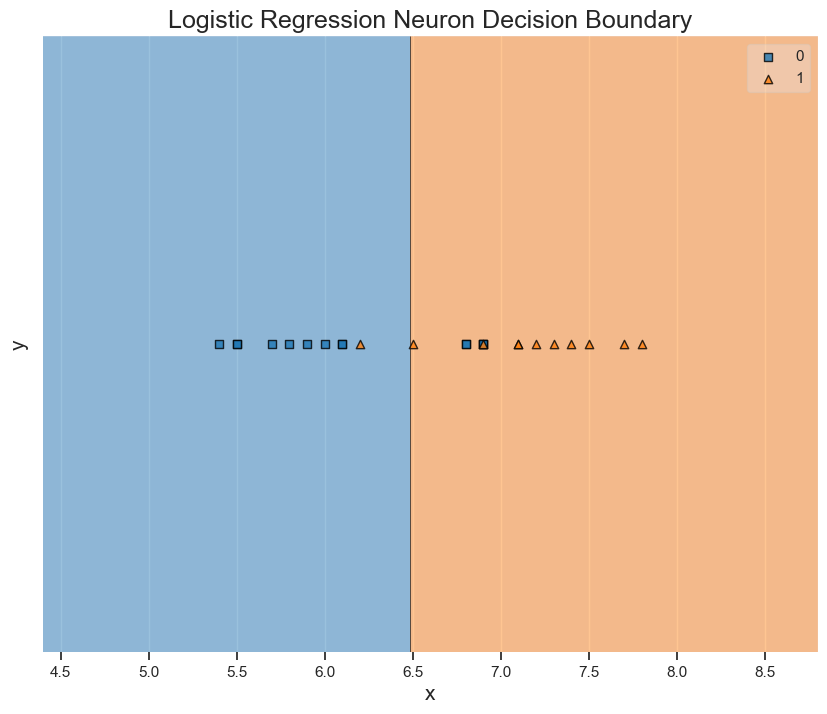

In [372]:
node.plot_decision_boundary(X, np.array(y))
plt.show()

---
#### **Part 2. Multiple Input**

Using candidates' gmat and gpa score to predict class of admit and not admit.

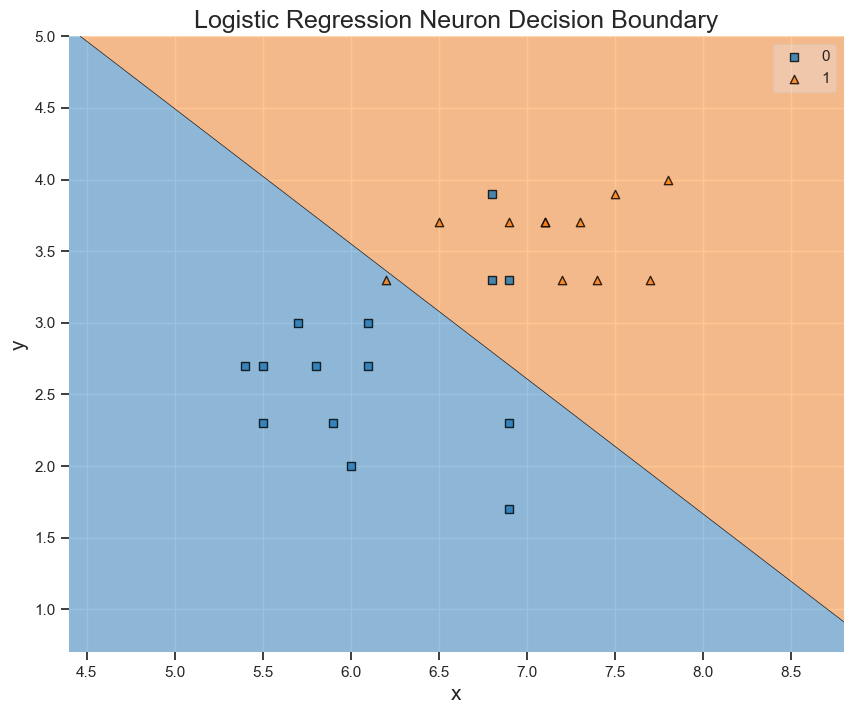

In [373]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
df.gmat = df.gmat/100
X_two = df[["gmat", "gpa"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.03, epochs = 5_000)

node_two.plot_decision_boundary(X_two, np.array(y))

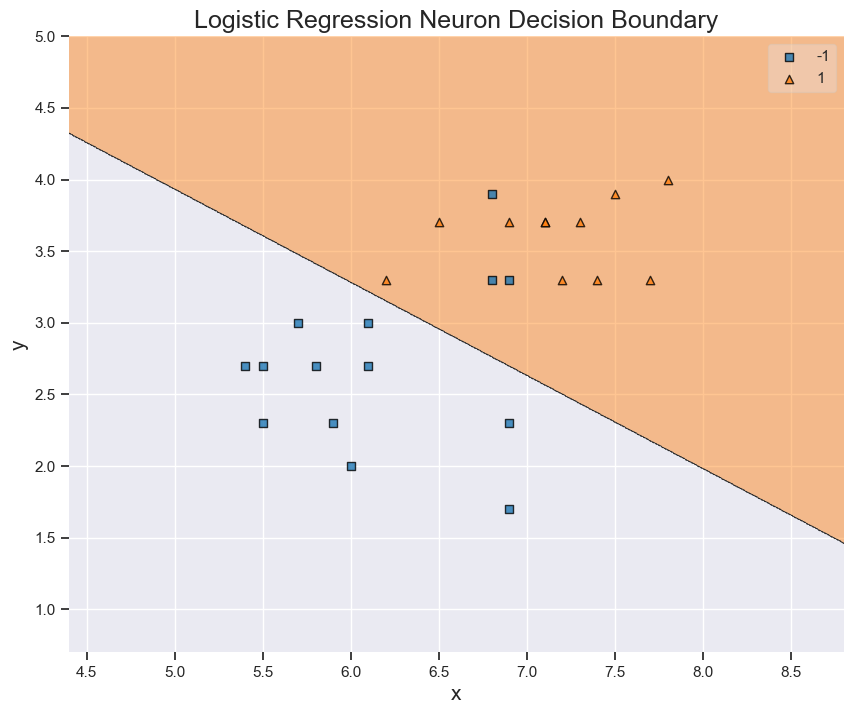

In [374]:
## Recall the Perceptron Algorithm
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

X_three = df[["gmat", "gpa"]].values

y_three = np.where(df["admitted"] == 0, -1, 1)

# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.03, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

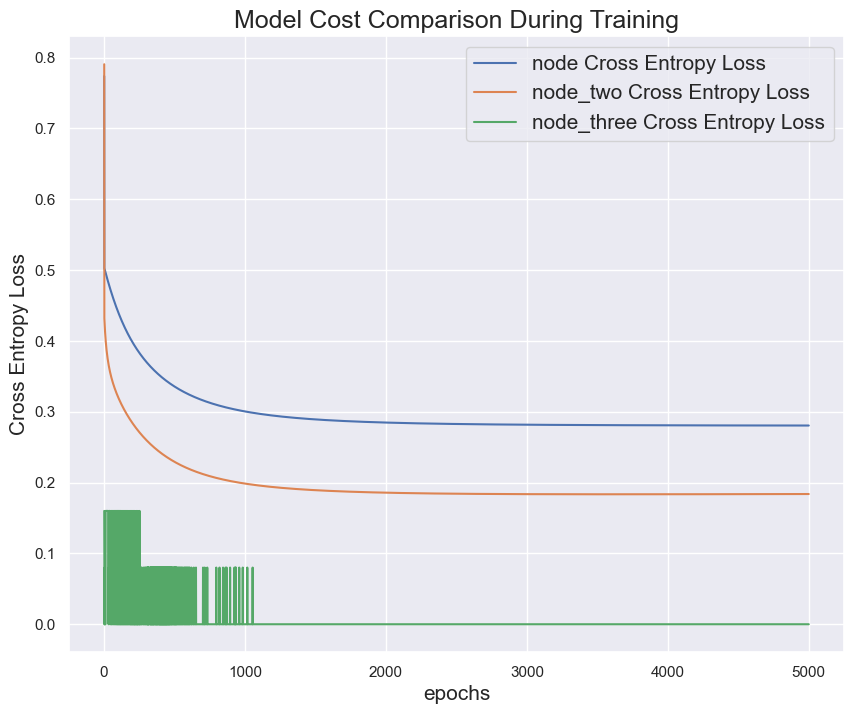

In [375]:

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = "node_two Cross Entropy Loss")
plt.plot(range(1, len(node_three.errors_) + 1), 
         node_three.errors_,
         label = "node_three Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)

plt.show()

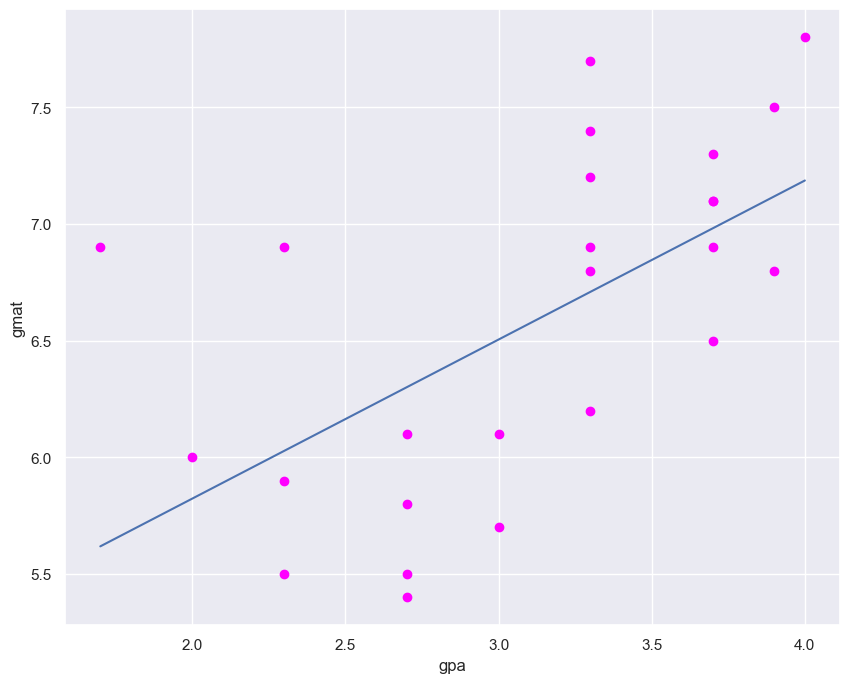

In [378]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df.gpa.values
X_four = X_four.reshape(-1, 1)

y_four = df.gmat.values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "setosa", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.xlabel("gpa")
plt.ylabel("gmat")
plt.show()